<h1>Clustering from ChatGPT 35:</h1>

<!-- <h2>Brewing type:</h2>

Spontaneously Fermented Beers:

- Lambic
- Faro
- Kriek


Mixed Fermentation Beers:

- Brett/cofermented


Ale Styles:

West Flanders ale
- Saison
- Dubbel
- Tripel
- Strong ale
- Blond


Fruit Beers:

- Fruit beer
- Kriek


Specialty Beers:

- Christmas


Wheat Beers:

- Wheat


Lager Styles:

- Pils/Lager


Dark Ales:

- Flanders old brown
- Brown
- Stout/Porter


Hoppy Beers:

- Hoppy


Unique Styles:

- Brut
- Scotch
- Low/No alcohol
- Amber -->



<h2>Taste Characteristics:</h2>

Sour/Funky Beers:

- Lambic
- Flanders old brown
- Brett/cofermented
- Faro


Fruit Beers:

- Kriek (Cherry)
- Fruitbeer (Various fruits)


Spiced/Seasonal Beers:

- Christmas
- Saison


Strong/Complex Beers (56):

- Tripel
- Dubbel
- Strong ale


Light/Refreshing Beers (54):

- Blond
- Pils/Lager
- Wheat


Dark/Robust Beers (37):

- Stout/Porter
- Brown
- Amber


Specialty Beers:

- Brut (Champagne-like)
- Scotch (Scotch barrel-aged)


Regional Varieties:

- West Flanders ale


Low Alcohol:

- Low/No alcohol


Hop-forward Beers:

- Hoppy

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
def normalize_column(col):
    return (col - col.mean()) / col.std()

In [3]:
raw_features = pd.read_csv('../data/beer_features.csv', index_col=0)
raw_labels_panel = pd.read_csv('../data/beer_labels_panel.csv', index_col=0)
raw_labels_ratebeer = pd.read_csv('../data/beer_labels_ratebeer.csv', index_col=0)

In [4]:
filled_features = raw_features.copy().dropna(axis=1, how='all')
filled_features[filled_features.columns[2:]] = filled_features[filled_features.columns[2:]].fillna(filled_features[filled_features.columns[2:]].median()).apply(normalize_column, axis=0)
filled_labels_panel = raw_labels_panel.copy().dropna(axis=1, how='all')
filled_labels_panel[filled_labels_panel.columns[2:]] = filled_labels_panel[filled_labels_panel.columns[2:]].fillna(filled_labels_panel[filled_labels_panel.columns[2:]].median()).apply(normalize_column, axis=0)
filled_labels_ratebeer = raw_labels_ratebeer.copy().dropna(axis=1, how='all')
filled_labels_ratebeer[filled_labels_ratebeer.columns[2:]] = filled_labels_ratebeer[filled_labels_ratebeer.columns[2:]].fillna(filled_labels_ratebeer[filled_labels_ratebeer.columns[2:]].median()).apply(normalize_column, axis=0)

In [5]:
panel_overall = filled_labels_panel['overall']
panel_overall

beer
10    -0.839322
86    -1.801135
2     -2.775332
83    -1.690403
40    -3.153923
         ...   
175    0.268282
196    1.139391
4      0.685659
99     0.873102
157    0.217785
Name: overall, Length: 250, dtype: float64

In [18]:
# Group by 'tasting_category_fine' and compute correlations
def compute_correlations(group, series):
    return group.apply(lambda col: col.corr(series), axis=0)

grouped_features = filled_features.drop(columns=['beer_id']).groupby('tasting_category_fine')
corrs = grouped_features.apply(lambda g: compute_correlations(g.drop(columns='tasting_category_fine'), panel_overall[g.index]))

corrs

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.11/lib/pytho

,acetaldehyde,CS2,DES,DMS,ethyl_2.methyl_butyrate,ethyl_acetate,ethyl_decanoate,ethyl_hexanoate,ethyl_isovalerate,ethyl_octanoate,...,X13.epi.manool.oxide,isopropyl.hexadecanoate,manool,ethyl.octadecanoate,ethyl.pentanoate,X2.ethyl.3.methylpyrazine,esters_sum,aroma_hops_sum,acids_sum,sulfur_sum
tasting_category_fine,,,,,,,,,,,,,,,,,,,,,
Amber,0.050448,1.706216e-01,-0.210370,-0.070527,-0.442082,0.206202,-0.568723,-0.090492,-0.174828,-0.486766,...,-0.143784,0.198642,-0.307991,-0.387851,-0.239624,0.197519,-0.090575,0.100382,-0.496140,-0.072120
Blond,0.530919,3.488265e-01,-0.144275,-0.027341,0.115810,0.571883,0.368090,0.289855,0.326560,0.404652,...,0.222323,0.020442,-0.001724,0.094403,0.096834,0.093694,0.535948,-0.009813,-0.309256,-0.157632
Brett/cofermented,-0.323371,1.065563e-16,0.626237,-0.451478,-0.179199,-0.359062,-0.701919,-0.538934,-0.112479,-0.779853,...,-0.521319,0.210278,-0.518720,-0.535660,0.360486,0.340378,-0.345894,0.576408,0.207560,-0.270626
Brown,0.504208,2.441401e-01,-0.144131,0.433193,-0.199979,0.652392,0.359433,0.373959,0.284925,0.326166,...,-0.274756,0.295612,0.305341,0.415888,-0.206499,0.041579,0.807755,0.560052,-0.115310,0.411967
Brut,0.301750,-1.351231e-01,0.188421,0.629743,-0.273892,-0.163689,-0.159856,0.282098,0.095834,-0.645970,...,0.235112,-0.135123,0.287795,0.148591,-0.302235,-0.626807,-0.489326,-0.373187,-0.552460,-0.177743
Christmas,0.480217,NaN,0.426841,0.545975,0.567996,0.151482,0.481292,0.468775,0.085086,0.378145,...,0.339527,-0.133581,0.239811,0.638649,0.345999,0.348124,0.295672,-0.577146,-0.064928,0.676026
Dubbel,-0.513877,3.532936e-01,0.079758,0.427434,-0.380327,0.088054,-0.040866,0.633022,0.123466,0.278999,...,-0.391239,0.266830,-0.525600,0.121564,-0.509481,0.592840,0.245723,0.052543,-0.101878,0.201587
Faro,-0.281299,NaN,0.745358,0.999949,0.482185,-0.821265,-0.653378,-0.875300,0.862717,0.886072,...,0.554859,0.444793,0.114948,0.907520,-0.022750,-0.468943,-0.348730,-0.985164,0.563115,0.911153
Flanders old brown,0.640115,3.831728e-17,-0.600806,-0.616401,-0.823546,-0.808438,0.136582,-0.365657,-0.940358,-0.262877,...,-0.178898,-0.757359,-0.303986,0.902172,-0.908636,-0.809759,-0.372546,-0.209705,-0.602149,-0.820363


<h3>NaN values mean that than column is constant for that beer group.</h3>

In [25]:
big_beers = ['Blond', 'Tripel', 'Strong ale', 'Stout/Porter', 'Brown', 'Wheat', 'Amber', 'Pils/Lager', 'Dubbel']

In [26]:
filled_corrs = corrs.fillna(0)
filled_corrs

,acetaldehyde,CS2,DES,DMS,ethyl_2.methyl_butyrate,ethyl_acetate,ethyl_decanoate,ethyl_hexanoate,ethyl_isovalerate,ethyl_octanoate,...,X13.epi.manool.oxide,isopropyl.hexadecanoate,manool,ethyl.octadecanoate,ethyl.pentanoate,X2.ethyl.3.methylpyrazine,esters_sum,aroma_hops_sum,acids_sum,sulfur_sum
tasting_category_fine,,,,,,,,,,,,,,,,,,,,,
Amber,0.050448,1.706216e-01,-0.210370,-0.070527,-0.442082,0.206202,-0.568723,-0.090492,-0.174828,-0.486766,...,-0.143784,0.198642,-0.307991,-0.387851,-0.239624,0.197519,-0.090575,0.100382,-0.496140,-0.072120
Blond,0.530919,3.488265e-01,-0.144275,-0.027341,0.115810,0.571883,0.368090,0.289855,0.326560,0.404652,...,0.222323,0.020442,-0.001724,0.094403,0.096834,0.093694,0.535948,-0.009813,-0.309256,-0.157632
Brett/cofermented,-0.323371,1.065563e-16,0.626237,-0.451478,-0.179199,-0.359062,-0.701919,-0.538934,-0.112479,-0.779853,...,-0.521319,0.210278,-0.518720,-0.535660,0.360486,0.340378,-0.345894,0.576408,0.207560,-0.270626
Brown,0.504208,2.441401e-01,-0.144131,0.433193,-0.199979,0.652392,0.359433,0.373959,0.284925,0.326166,...,-0.274756,0.295612,0.305341,0.415888,-0.206499,0.041579,0.807755,0.560052,-0.115310,0.411967
Brut,0.301750,-1.351231e-01,0.188421,0.629743,-0.273892,-0.163689,-0.159856,0.282098,0.095834,-0.645970,...,0.235112,-0.135123,0.287795,0.148591,-0.302235,-0.626807,-0.489326,-0.373187,-0.552460,-0.177743
Christmas,0.480217,0.000000e+00,0.426841,0.545975,0.567996,0.151482,0.481292,0.468775,0.085086,0.378145,...,0.339527,-0.133581,0.239811,0.638649,0.345999,0.348124,0.295672,-0.577146,-0.064928,0.676026
Dubbel,-0.513877,3.532936e-01,0.079758,0.427434,-0.380327,0.088054,-0.040866,0.633022,0.123466,0.278999,...,-0.391239,0.266830,-0.525600,0.121564,-0.509481,0.592840,0.245723,0.052543,-0.101878,0.201587
Faro,-0.281299,0.000000e+00,0.745358,0.999949,0.482185,-0.821265,-0.653378,-0.875300,0.862717,0.886072,...,0.554859,0.444793,0.114948,0.907520,-0.022750,-0.468943,-0.348730,-0.985164,0.563115,0.911153
Flanders old brown,0.640115,3.831728e-17,-0.600806,-0.616401,-0.823546,-0.808438,0.136582,-0.365657,-0.940358,-0.262877,...,-0.178898,-0.757359,-0.303986,0.902172,-0.908636,-0.809759,-0.372546,-0.209705,-0.602149,-0.820363


In [32]:
filled_corrs.loc[big_beers]

,acetaldehyde,CS2,DES,DMS,ethyl_2.methyl_butyrate,ethyl_acetate,ethyl_decanoate,ethyl_hexanoate,ethyl_isovalerate,ethyl_octanoate,...,X13.epi.manool.oxide,isopropyl.hexadecanoate,manool,ethyl.octadecanoate,ethyl.pentanoate,X2.ethyl.3.methylpyrazine,esters_sum,aroma_hops_sum,acids_sum,sulfur_sum
tasting_category_fine,,,,,,,,,,,,,,,,,,,,,
Blond,0.530919,3.488265e-01,-0.144275,-0.027341,0.115810,0.571883,0.368090,0.289855,0.326560,0.404652,...,0.222323,0.020442,-0.001724,0.094403,0.096834,0.093694,0.535948,-0.009813,-0.309256,-0.157632
Tripel,0.079243,-5.177877e-02,-0.199134,-0.062680,-0.217714,0.092087,-0.251877,-0.202544,-0.146178,-0.292855,...,-0.148747,0.412995,0.008751,0.040278,0.127290,0.176250,0.124134,-0.236693,0.018518,0.056379
Strong ale,0.238186,-2.584961e-02,-0.035400,0.394999,-0.165496,0.377976,0.440015,0.238553,-0.000960,0.352831,...,-0.171145,-0.654229,-0.385716,-0.208346,-0.255902,-0.078458,0.265637,-0.170691,-0.142189,0.214874
Stout/Porter,-0.346034,1.817667e-01,0.345544,0.469374,0.459095,0.344238,0.126194,-0.122644,0.079085,0.295474,...,0.682398,-0.175157,0.329607,0.350861,-0.200520,-0.519104,0.112677,0.133602,-0.005135,0.431994
Brown,0.504208,2.441401e-01,-0.144131,0.433193,-0.199979,0.652392,0.359433,0.373959,0.284925,0.326166,...,-0.274756,0.295612,0.305341,0.415888,-0.206499,0.041579,0.807755,0.560052,-0.115310,0.411967
Wheat,0.390819,1.730695e-17,0.086147,0.556900,0.133388,0.540856,0.069291,0.174186,0.411612,0.307207,...,-0.187512,-0.364900,-0.334902,-0.250162,-0.418457,-0.079458,0.574789,-0.370210,-0.032964,0.174048
Amber,0.050448,1.706216e-01,-0.210370,-0.070527,-0.442082,0.206202,-0.568723,-0.090492,-0.174828,-0.486766,...,-0.143784,0.198642,-0.307991,-0.387851,-0.239624,0.197519,-0.090575,0.100382,-0.496140,-0.072120
Pils/Lager,0.055553,-2.659568e-01,0.312788,0.438947,0.009800,0.137069,0.401518,0.309056,-0.106298,0.333122,...,0.308793,0.361246,0.374930,0.200184,0.318680,-0.152240,0.109437,-0.059996,-0.168925,0.290635
Dubbel,-0.513877,3.532936e-01,0.079758,0.427434,-0.380327,0.088054,-0.040866,0.633022,0.123466,0.278999,...,-0.391239,0.266830,-0.525600,0.121564,-0.509481,0.592840,0.245723,0.052543,-0.101878,0.201587


In [64]:
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
beer_set = filled_corrs.loc[big_beers].iloc[[0,1,2,5,8]]
# Calculate the pairwise Euclidean distances
distances = pdist(beer_set, metric='euclidean')

# Convert the distances to a square form matrix
distance_matrix = squareform(distances)

# Create a DataFrame for easier interpretation
distance_df = pd.DataFrame(distance_matrix, index=beer_set.index, columns=beer_set.index)

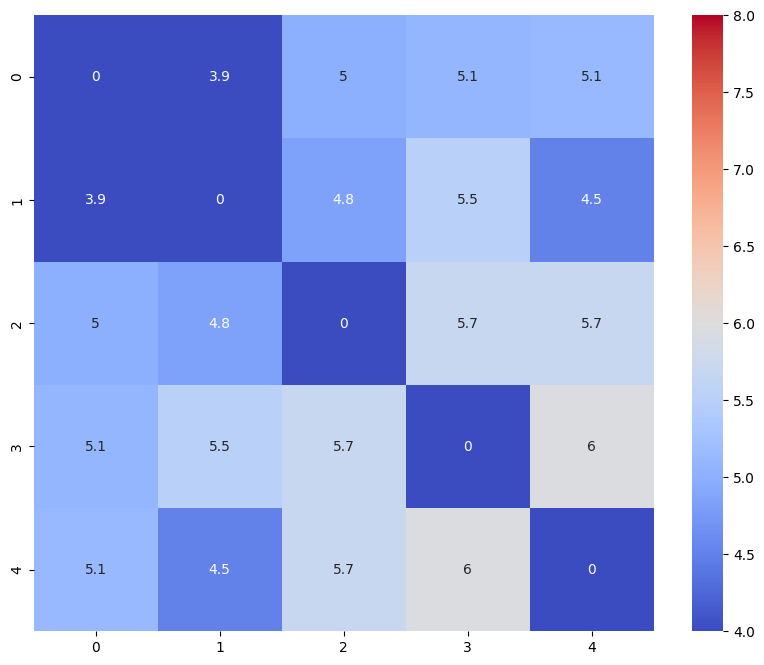

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(distance_df.values, annot=True, cmap='coolwarm', vmin=4, vmax=8)
plt.show()

In [125]:
type_strong = ['Tripel', 'Dubbel', 'Strong ale']
type_strong_p = ['Tripel', 'Dubbel', 'Strong ale', 'Blond']
type_strong_pp = ['Tripel', 'Dubbel', 'Strong ale', 'Blond', 'Wheat']
all = [*filled_labels_panel['tasting_category_fine'].unique()]

In [127]:
print(len(filled_labels_panel[filled_labels_panel['tasting_category_fine'].isin(type_strong)]))
print(len(filled_labels_panel[filled_labels_panel['tasting_category_fine'].isin(type_strong_p)]))
print(len(filled_labels_panel[filled_labels_panel['tasting_category_fine'].isin(type_strong_pp)]))
print(len(filled_labels_panel[filled_labels_panel['tasting_category_fine'].isin(all)]))

56
87
99
250


In [129]:
for type_name, beer_types in zip(['strong', 'strong_p', 'strong_pp', 'all'], [type_strong, type_strong_p, type_strong_pp, all]):
    type_labels_panel = filled_labels_panel[filled_labels_panel['tasting_category_fine'].isin(beer_types)]
    type_features = filled_features[filled_features['tasting_category_fine'].isin(beer_types)]

    beer_type_splits = [round(i * 0.95) for i in list(Counter(list(type_labels_panel['tasting_category_fine'].sort_values())).values())]

    # -------------------- FEATURES --------------------
    # Sort the DataFrame by 'tasting_category_fine'
    sorted_features = type_features.sort_values(by='tasting_category_fine')

    # Initialize empty DataFrames for the splits
    features_70 = pd.DataFrame(columns=type_features.columns)
    features_30 = pd.DataFrame(columns=type_features.columns)

    # Iterate over unique values in 'tasting_category_fine' and split them according to beer_type_splits
    for category, count in zip(sorted_features['tasting_category_fine'].unique(), beer_type_splits):
        category_subset = sorted_features[sorted_features['tasting_category_fine'] == category]
        features_70 = pd.concat([features_70, category_subset.head(count)])
        features_30 = pd.concat([features_30, category_subset.tail(len(category_subset) - count)])

    print(list(features_70['tasting_category_fine']))
    print(list(features_30['tasting_category_fine']))

    features_70 = features_70.drop(columns=['beer_id', 'tasting_category_fine'])
    features_30 = features_30.drop(columns=['beer_id', 'tasting_category_fine'])


    # -------------------- LABELS PANEL --------------------
    # Sort the DataFrame by 'tasting_category_fine'
    sorted_labels_panel = type_labels_panel.sort_values(by='tasting_category_fine')

    # Initialize empty DataFrames for the splits
    labels_panel_70 = pd.DataFrame(columns=type_labels_panel.columns)
    labels_panel_30 = pd.DataFrame(columns=type_labels_panel.columns)

    # Iterate over unique values in 'tasting_category_fine' and split them according to beer_type_splits
    for category, count in zip(sorted_labels_panel['tasting_category_fine'].unique(), beer_type_splits):
        category_subset = sorted_labels_panel[sorted_labels_panel['tasting_category_fine'] == category]
        labels_panel_70 = pd.concat([labels_panel_70, category_subset.head(count)])
        labels_panel_30 = pd.concat([labels_panel_30, category_subset.tail(len(category_subset) - count)])

    labels_panel_70 = labels_panel_70.drop(columns=['beer_id', 'tasting_category_fine'])
    labels_panel_30 = labels_panel_30.drop(columns=['beer_id', 'tasting_category_fine'])

    features_70.to_csv(f'../data/beer_{type_name}_features_train.csv', index=True)
    features_30.to_csv(f'../data/beer_{type_name}_features_test.csv', index=True)
    labels_panel_70.to_csv(f'../data/beer_{type_name}_labels_panel_train.csv', index=True)
    labels_panel_30.to_csv(f'../data/beer_{type_name}_labels_panel_test.csv', index=True)

    sample_dfs = []
    for df in [features_70, labels_panel_70]:
        df_samples = pd.DataFrame()
        stderr_row = df.var()

        # For each row in the original DataFrames
        for idx in range(len(df)):
            # Get mean and standard error for the current row
            mean_row = df.iloc[idx]

            # Generate 10 samples from the normal distribution with the mean and standard error
            np.random.seed(42)
            samples = pd.DataFrame({column: np.random.normal(mean, stderr/20, 10) for column, mean, stderr in zip(df.columns, mean_row, stderr_row)})

            # Append the samples to the new DataFrame
            df_samples = pd.concat([df_samples, samples], ignore_index=True)

        sample_dfs.append(df_samples)

    features_70_samples, labels_panel_70_samples = sample_dfs

    features_70_samples.to_csv(f'../data/beer_{type_name}_features_train_samples_small.csv', index=True)
    labels_panel_70_samples.to_csv(f'../data/beer_{type_name}_labels_panel_train_samples_small.csv', index=True)

/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_70 = pd.concat([features_70, category_subset.head(count)])
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_30 = pd.concat([features_30, category_subset.tail(len(category_subset) - count)])
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:39: 

['Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel']
['Strong ale', 'Tripel']


/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_70 = pd.concat([features_70, category_subset.head(count)])
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_30 = pd.concat([features_30, category_subset.tail(len(category_subset) - count)])
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:39: 

['Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel']
['Blond', 'Blond', 'Strong ale', 'Tripel']


/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_70 = pd.concat([features_70, category_subset.head(count)])
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_30 = pd.concat([features_30, category_subset.tail(len(category_subset) - count)])
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:39: 

['Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Strong ale', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Tripel', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat']
['Blond', 'Blond', 'Strong ale'

/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_70 = pd.concat([features_70, category_subset.head(count)])
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_30 = pd.concat([features_30, category_subset.tail(len(category_subset) - count)])
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_21300/2453930912.py:39: 

['Amber', 'Amber', 'Amber', 'Amber', 'Amber', 'Amber', 'Amber', 'Amber', 'Amber', 'Amber', 'Amber', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Blond', 'Brett/cofermented', 'Brett/cofermented', 'Brett/cofermented', 'Brett/cofermented', 'Brett/cofermented', 'Brett/cofermented', 'Brown', 'Brown', 'Brown', 'Brown', 'Brown', 'Brown', 'Brown', 'Brown', 'Brown', 'Brown', 'Brown', 'Brut', 'Brut', 'Brut', 'Brut', 'Christmas', 'Christmas', 'Christmas', 'Christmas', 'Christmas', 'Christmas', 'Christmas', 'Christmas', 'Christmas', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Dubbel', 'Faro', 'Faro', 'Faro', 'Flanders old brown', 'Flanders old brown', 'Flanders old brown', 'Flanders old brown', 'Flanders old brown', 'Fruitbeer', 'Fruitbeer', 'Frui